<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Сегодня мы изучим основы работы с библиотекой `PyTorch`.

<h3 style="text-align: center;"><b>Установка</b></h3>

Подробную инструкцию по установке PyTorch вы можете найти на [официальном сайте PyTorch](https://pytorch.org/).

## Синтаксис Фреймворка

In [1]:
import torch

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого создания нейронных сетей
- позволяет легко использовать **GPU**

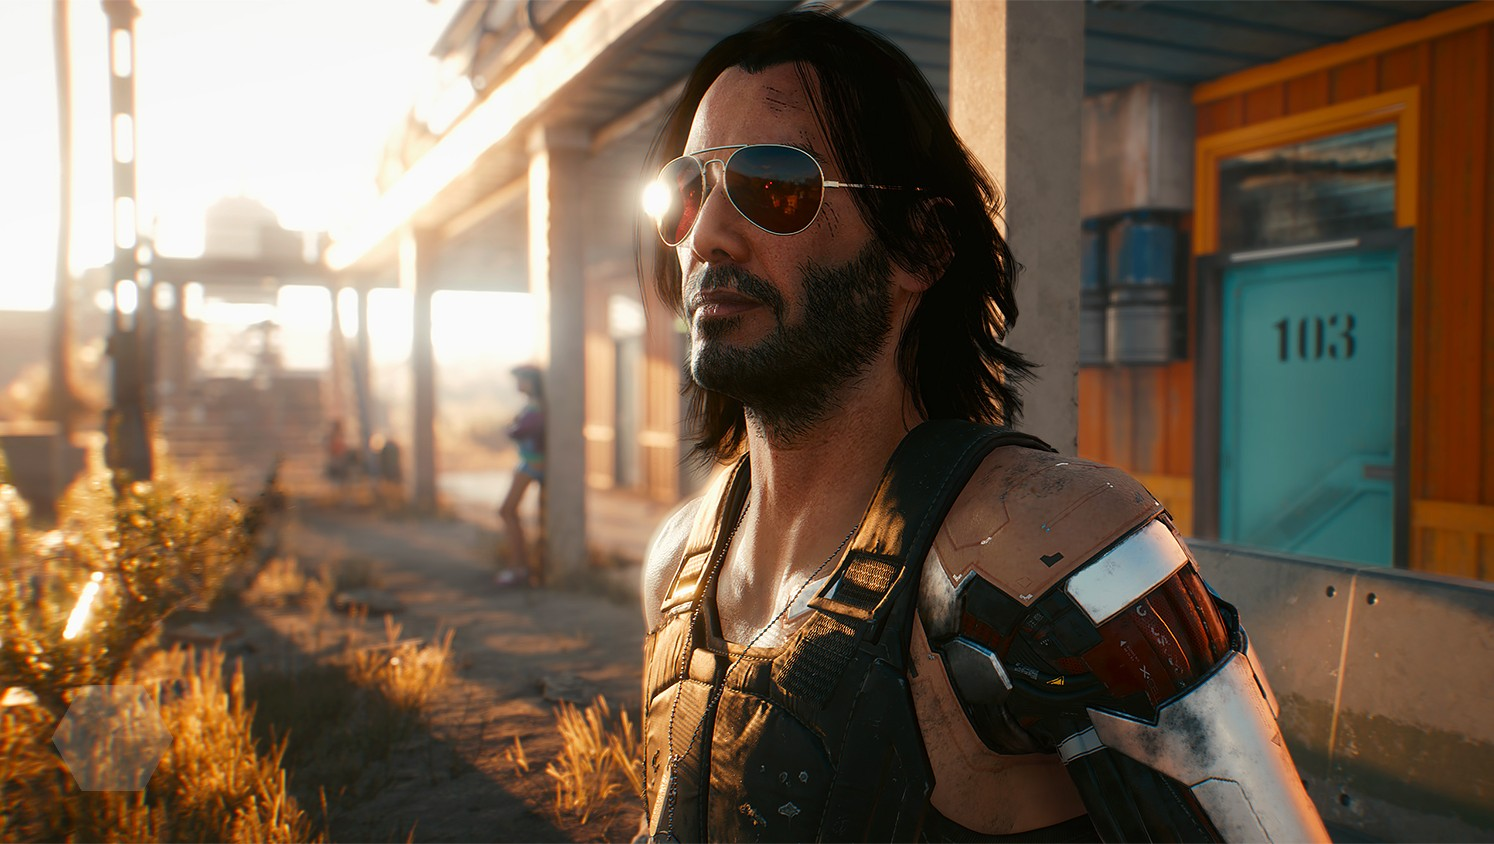

По своей сути `PyTorch` предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференцирование для построения и обучения нейронных сетей

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

При работе с `numpy` мы часто использовали слово *вектор* или *матрица*. Теперь мы изучим новое слово &ndash; **тензор**.  **Тензор** - это многомерный вектор, например:

`x = np.array([1, 2, 3])` &ndash; вектор == тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array([[1, 2, 3], [4, 5, 6]])` &ndash; матрица == тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `&ndash; "куб "(3, 3, 3) == тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)

Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из чисел.

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`) для всех вычислений.

Все типы:

- `torch.HalfTensor`      # 16 бит, floating point
- `torch.FloatTensor`     # 32 бита, floating point
- `torch.DoubleTensor`    # 64 бита, floating point

- `torch.ShortTensor`     # 16 бит, integer, signed
- `torch.IntTensor`       # 32 бита, integer, signed
- `torch.LongTensor`      # 64 бита, integer, signed

- `torch.CharTensor`      # 8 бит, integer, signed
- `torch.ByteTensor`      # 8 бит, integer, unsigned

В основном мы будем использовать `torch.FloatTensor()` и `torch.IntTensor()`.

### Создадим тензор

In [2]:
a = torch.FloatTensor([1, 2])
a

tensor([1., 2.])

In [3]:
a.shape

torch.Size([2])

In [4]:
a.size()

torch.Size([2])

In [5]:
b = torch.FloatTensor([[1, 1, 1],
                       [2, 3, 10]])
b

tensor([[ 1.,  1.,  1.],
        [ 2.,  3., 10.]])

In [6]:
b.shape

torch.Size([2, 3])

In [7]:
b.size()

torch.Size([2, 3])

In [8]:
x = torch.FloatTensor(2, 3, 4)
x

tensor([[[1.8914e-01, 4.0492e-41, 1.2386e+34, 3.1975e-41],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 3.1982e-41, 1.8788e+31, 1.7220e+22]],

        [[2.1715e-18, 6.6765e+22, 3.2918e-09, 4.3167e-08],
         [4.2968e-05, 1.0931e-05, 4.2010e-05, 1.3384e+22],
         [1.3166e-08, 4.2462e-08, 2.1707e-18, 1.6678e+19]]])

In [9]:
x.shape

torch.Size([2, 3, 4])

In [10]:
x = torch.FloatTensor(50)
x

tensor([ 1.8914e-01,  4.0492e-41,  1.8914e-01,  4.0492e-41,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.4013e-45,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  8.4078e-45,
         0.0000e+00,  1.4013e-45,  0.0000e+00,  9.1844e-41,  1.1551e-40,
         4.5919e-41,  8.2957e-43,  2.9147e-43,  0.0000e+00,  6.7262e-44,
         0.0000e+00, -5.7192e+25,  3.1982e-41,  0.0000e+00,  0.0000e+00,
         1.4013e-45,  0.0000e+00,  0.0000e+00,  4.0491e-41,  3.0155e+09,
         4.0491e-41,  4.6243e-44,  0.0000e+00,  1.2448e+34,  3.1975e-41])

In [11]:
x.shape

torch.Size([50])

In [12]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен случайными числами (что в целом логично):

In [13]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[1044491712,      28896, 1044491712,      28896],
         [ 876228659,  825503282,        209,          0]],

        [[1969248304,      22818, 1044491488,      28896],
         [ 758329399,  808936761,  858797101,  892939618]],

        [[ 808281445,  909259873,  845494628,  573793076],
         [1830953004, 1952409459,         33,          0]]], dtype=torch.int32)

### Еще способы:

In [14]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Получим числа из нормального распределения:

In [15]:
x = torch.randn((2, 3)) # Normal(0, 1) с размером (2, 3)
x

tensor([[-0.6108, -0.5259,  0.0109],
        [-0.3541, -2.6358, -0.8169]])

In [18]:
x.random_(0, 10) # Дискретное равномерно U[0, 10]

tensor([[5., 7., 4.],
        [1., 7., 4.]])

In [19]:
x.uniform_(0, 1) # Равномерно U[0, 1]

tensor([[0.9392, 0.7161, 0.2628],
        [0.8953, 0.8039, 0.0811]])

In [20]:
x.normal_(mean=0, std=1) # Нормальное со средним 0 и дисперсией 1

tensor([[-0.5737,  0.5521,  0.8910],
        [-0.3400,  0.0459,  0.9019]])

In [21]:
x.bernoulli_(p=0.5) # bernoulli with parameter p

tensor([[1., 0., 0.],
        [1., 0., 1.]])

## Функции в Torch 

У многих функций `numpy` есть своя пара в `PyTorch`! Осталось теперь вспомнить `numpy` 😨 😰 😥 😓 🤗

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

### Изменение формы
`np.reshape()` == `torch.view()`:

In [22]:
b, b.shape

(tensor([[ 1.,  1.,  1.],
         [ 2.,  3., 10.]]),
 torch.Size([2, 3]))

In [23]:
b.view(3, 2).shape

torch.Size([3, 2])

**Примечание:** `torch.view()` создает новый тензор, но старый остается неизменным

In [24]:
b.view(-1, 2).shape, b.view(-1).shape

(torch.Size([3, 2]), torch.Size([6]))

### Изменение типа тензора

In [25]:
a = torch.FloatTensor([1.5, 3.2, -7])
a

tensor([ 1.5000,  3.2000, -7.0000])

In [26]:
a.dtype

torch.float32

In [27]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [28]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [29]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [30]:
a.to(torch.uint8)

tensor([  1,   3, 249], dtype=torch.uint8)

**Внимание:** `.type_as()` создает новый тензор, но старый остается неизменным

In [32]:
a.dtype

torch.float32

### Индексация

Все как в `numpy`)

In [33]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [34]:
a[0, 0]

tensor(100.)

In [35]:
a[:3, 2]

tensor([ 35., 534.,  66.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

#### Сложение

In [36]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [37]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [38]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [39]:
b.add(a) == a.add(b)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [40]:
-a + a

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [41]:
a - b

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])

In [42]:
a.sub(b) # Возвращает

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])

In [43]:
a.sub_(b) # inplace

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])

In [44]:
a

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])

#### Умножение (поэлементное)

In [45]:
a * b

tensor([[   -2.,    -8.,   -18.],
        [ -200.,  -800., -1800.],
        [    0.,     0.,     0.]])

In [46]:
a.mul(b)

tensor([[   -2.,    -8.,   -18.],
        [ -200.,  -800., -1800.],
        [    0.,     0.,     0.]])

#### Деление (поэлементное)

In [47]:
a / b

tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [ 0.,  0.,  0.]])

In [48]:
a.div(b)

tensor([[-2., -2., -2.],
        [-2., -2., -2.],
        [ 0.,  0.,  0.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными

In [49]:
a

tensor([[ 2.,  4.,  6.],
        [20., 40., 60.],
        [ 0.,  0.,  0.]])

In [50]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [51]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [52]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [53]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [54]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [55]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [56]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [57]:
a[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **распространенных функций**

In [58]:
a = torch.FloatTensor([[-0.5, 0.5, 0], [-10, -20, -30], [100, 200, 300]])

In [59]:
a.sin()

tensor([[-0.4794,  0.4794,  0.0000],
        [ 0.5440, -0.9129,  0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [60]:
torch.sin(a)

tensor([[-0.4794,  0.4794,  0.0000],
        [ 0.5440, -0.9129,  0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [61]:
a.exp()

tensor([[6.0653e-01, 1.6487e+00, 1.0000e+00],
        [4.5400e-05, 2.0612e-09, 9.3576e-14],
        [       inf,        inf,        inf]])

In [62]:
a.tanh()

tensor([[-0.4621,  0.4621,  0.0000],
        [-1.0000, -1.0000, -1.0000],
        [ 1.0000,  1.0000,  1.0000]])

In [63]:
a.sigmoid()

tensor([[3.7754e-01, 6.2246e-01, 5.0000e-01],
        [4.5398e-05, 2.0612e-09, 9.3576e-14],
        [1.0000e+00, 1.0000e+00, 1.0000e+00]])

In [64]:
a.log()

tensor([[    nan, -0.6931,    -inf],
        [    nan,     nan,     nan],
        [ 4.6052,  5.2983,  5.7038]])

In [65]:
a.abs()

tensor([[  0.5000,   0.5000,   0.0000],
        [ 10.0000,  20.0000,  30.0000],
        [100.0000, 200.0000, 300.0000]])

### Агрегация и работа с осями
#### sum, mean, max, min:

In [66]:
a

tensor([[ -0.5000,   0.5000,   0.0000],
        [-10.0000, -20.0000, -30.0000],
        [100.0000, 200.0000, 300.0000]])

In [71]:
a.sum()

tensor(540.)

In [72]:
a.sum().item()

540.0

In [73]:
a.sum().item() == a.sum()

tensor(True)

In [74]:
a.sum().item() is a.sum()

False

In [75]:
a.mean()

tensor(60.)

#### Применение функции вдоль оси

In [76]:
a

tensor([[ -0.5000,   0.5000,   0.0000],
        [-10.0000, -20.0000, -30.0000],
        [100.0000, 200.0000, 300.0000]])

In [78]:
a.sum(dim=0)

tensor([ 89.5000, 180.5000, 270.0000])

In [79]:
a.sum(dim=1)

tensor([  0., -60., 600.])

In [80]:
a.max()

tensor(300.)

In [81]:
a.max(dim=0)

torch.return_types.max(
values=tensor([100., 200., 300.]),
indices=tensor([2, 2, 2]))

In [82]:
c, d = a.max(dim=0)

In [83]:
c, d

(tensor([100., 200., 300.]), tensor([2, 2, 2]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max()` вернула `(100, 200, 300)`, которые являются max элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.

In [84]:
a[:, None, :].shape

torch.Size([3, 1, 3])

In [85]:
a[:, :, None].shape

torch.Size([3, 3, 1])

#### Очень простая задача
Дана матрица $M \times N$. Напишите функцию, которая возвращает вектор средних значений по вертикали.

In [86]:
def vertical_means(A):
    """
    param A: torch.tensor[m, n]
    """
    # <YOUR CODE>
    result = A.mean(dim=0)

    return result

A = torch.FloatTensor([[1, 4],
                       [2, 7]])

vertical_means(A)

tensor([1.5000, 5.5000])

**Проблемы:**

* Что такое вертикальная ось? 
* По какой оси необходимо суммировать?
* Как не ошибиться?

**Ответ:** Операции всегда производятся по той оси, которая **исчезнет** после применения операции.

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор &ndash; батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение &ndash; 1.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# BATCH_SIZE, N_CHANNELS, WIDTH, HEIGHT
image_batch = torch.randint(0, 255, (64, 3, 300, 300), dtype=torch.float32)

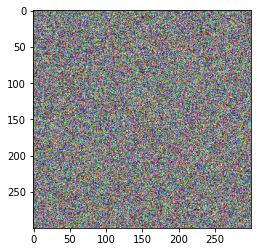

In [90]:
plt.imshow(image_batch[0].to(torch.int32).view(300, 300, 3).numpy());

In [91]:
image_batch.mean(dim=(0, 2, 3))

tensor([127.0364, 127.0454, 126.9813])

In [92]:
image_batch.std(dim=(0, 2, 3))

tensor([73.6186, 73.6075, 73.6065])

In [93]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """
    # <YOUR CODE>
    m = A.mean(dim=(0, 2, 3))
    sigma = A.std(dim=(0, 2, 3))
    result = (A - m[None, :, None, None]) / sigma[None, :, None, None]

    return result

In [94]:
B = normalize_pictures(image_batch)

In [95]:
B.mean(dim=(0, 2, 3)), B.std(dim=(0, 2, 3))

(tensor([-2.1723e-07,  1.8545e-07, -8.1815e-08]),
 tensor([1.0000, 1.0000, 1.0000]))

## Матричные операции

#### Транспонирование тензора

In [96]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [97]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

In [99]:
a.T

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [100]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [101]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [102]:
a.dot(b)

tensor(-141.)

In [103]:
a @ b

tensor(-141.)

#### Матричное произведение

In [105]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [106]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [107]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [108]:
a = np.random.rand(3, 3)
a

array([[0.46414513, 0.49038113, 0.79793359],
       [0.50636129, 0.84919763, 0.89096428],
       [0.32654101, 0.21050258, 0.36612537]])

In [109]:
b = torch.from_numpy(a)
b

tensor([[0.4641, 0.4904, 0.7979],
        [0.5064, 0.8492, 0.8910],
        [0.3265, 0.2105, 0.3661]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [110]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [111]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [112]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[1.7793e+34, 3.1975e-41, 2.0245e+34, 3.1975e-41],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.1351e-43, 0.0000e+00],
         [1.7806e+34, 3.1975e-41, 1.2858e+34, 3.1975e-41],
         [7.0065e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])

In [113]:
x = a.numpy()
x

array([[[1.7792882e+34, 3.1974828e-41, 2.0245252e+34, 3.1974828e-41],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.1350518e-43, 0.0000000e+00],
        [1.7805896e+34, 3.1974828e-41, 1.2857622e+34, 3.1974828e-41],
        [7.0064923e-45, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]]],
      dtype=float32)

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``.

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [114]:
# <YOUR CODE>
def forward_pass(X, w):
    logits = X @ w
    result  = torch.sigmoid(logits)

    return result

In [116]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print(f'result: {result}')

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA &ndash; это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA &ndash; это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [117]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.6409, 0.0573, 0.7172,  ..., 0.1415, 0.3862, 0.6942],
        [0.8003, 0.2680, 0.8578,  ..., 0.1819, 0.1010, 0.1783],
        [0.7383, 0.8546, 0.2590,  ..., 0.2575, 0.1238, 0.4592],
        ...,
        [0.9628, 0.9179, 0.8262,  ..., 0.6343, 0.8630, 0.0107],
        [0.1350, 0.7369, 0.2899,  ..., 0.4557, 0.9833, 0.3129],
        [0.2968, 0.6608, 0.1883,  ..., 0.6461, 0.5288, 0.0957]])

In [118]:
x.is_cuda

False

#### Кладём тензор на GPU

In [119]:
!nvidia-smi

Mon Mar 25 18:59:53 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.239.06   Driver Version: 470.239.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8    11W /  N/A |     24MiB /  7982MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [120]:
x = x.cuda()

In [121]:
!nvidia-smi

Mon Mar 25 19:00:55 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.239.06   Driver Version: 470.239.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P0    28W /  N/A |    577MiB /  7982MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [122]:
x

tensor([[0.6409, 0.0573, 0.7172,  ..., 0.1415, 0.3862, 0.6942],
        [0.8003, 0.2680, 0.8578,  ..., 0.1819, 0.1010, 0.1783],
        [0.7383, 0.8546, 0.2590,  ..., 0.2575, 0.1238, 0.4592],
        ...,
        [0.9628, 0.9179, 0.8262,  ..., 0.6343, 0.8630, 0.0107],
        [0.1350, 0.7369, 0.2899,  ..., 0.4557, 0.9833, 0.3129],
        [0.2968, 0.6608, 0.1883,  ..., 0.6461, 0.5288, 0.0957]],
       device='cuda:0')

In [123]:
x = x.cpu()
!nvidia-smi

Mon Mar 25 19:03:09 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.239.06   Driver Version: 470.239.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0    27W /  N/A |    579MiB /  7982MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [124]:
torch.cuda.empty_cache()
!nvidia-smi

Mon Mar 25 19:03:38 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.239.06   Driver Version: 470.239.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8    11W /  N/A |    577MiB /  7982MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [125]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

x = x.to(device)
x

cuda:0


tensor([[0.6409, 0.0573, 0.7172,  ..., 0.1415, 0.3862, 0.6942],
        [0.8003, 0.2680, 0.8578,  ..., 0.1819, 0.1010, 0.1783],
        [0.7383, 0.8546, 0.2590,  ..., 0.2575, 0.1238, 0.4592],
        ...,
        [0.9628, 0.9179, 0.8262,  ..., 0.6343, 0.8630, 0.0107],
        [0.1350, 0.7369, 0.2899,  ..., 0.4557, 0.9833, 0.3129],
        [0.2968, 0.6608, 0.1883,  ..., 0.6461, 0.5288, 0.0957]],
       device='cuda:0')

Умножим два тензора в GPU и вернём результат обратно на CPU:

In [127]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [128]:
c

tensor([[0.0796, 0.1055, 0.0035,  ..., 0.4797, 0.2558, 0.1391],
        [0.0667, 0.4077, 0.1244,  ..., 0.0641, 0.0450, 0.0583],
        [0.3637, 0.7065, 0.0008,  ..., 0.7756, 0.0898, 0.2344],
        ...,
        [0.7929, 0.4401, 0.2403,  ..., 0.1935, 0.0708, 0.2052],
        [0.1116, 0.1527, 0.1606,  ..., 0.6026, 0.0869, 0.2336],
        [0.2146, 0.4372, 0.1505,  ..., 0.2365, 0.2741, 0.2245]])

In [129]:
a

tensor([[0.7911, 0.4208, 0.6074,  ..., 0.5512, 0.3889, 0.4429],
        [0.9001, 0.8321, 0.8532,  ..., 0.3670, 0.1761, 0.5343],
        [0.4922, 0.7630, 0.0020,  ..., 0.9486, 0.1178, 0.3613],
        ...,
        [0.8003, 0.6130, 0.2944,  ..., 0.3121, 0.1530, 0.7805],
        [0.7893, 0.3608, 0.2520,  ..., 0.7403, 0.8014, 0.2935],
        [0.8992, 0.8176, 0.3552,  ..., 0.9525, 0.4497, 0.5114]])

Тензоры на разных девайсах не совместимы:

In [130]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [131]:
a + b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

### Пример работы на GPU

In [132]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [133]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

tensor([[[1.2652, 1.2519, 1.7290, 1.2234, 1.7014],
         [1.5653, 1.8525, 1.2777, 1.7048, 1.1586],
         [1.9633, 1.0537, 1.8892, 1.3589, 1.2054],
         [1.6780, 1.7695, 1.2741, 1.5070, 1.4572],
         [1.7151, 1.3766, 1.9152, 1.4601, 1.2681]],

        [[1.2246, 1.0906, 1.4057, 1.6185, 1.6858],
         [1.2304, 1.6174, 1.8534, 1.3694, 1.2310],
         [1.9456, 1.2763, 1.9722, 1.4278, 1.0257],
         [1.5588, 1.7356, 1.1985, 1.9080, 1.9456],
         [1.8855, 1.4245, 1.2952, 1.2653, 1.9082]],

        [[1.6192, 1.7229, 1.0795, 1.7795, 1.9203],
         [1.8142, 1.6009, 1.4110, 1.1786, 1.3416],
         [1.2447, 1.3919, 1.4809, 1.6479, 1.6273],
         [1.1828, 1.4157, 1.2506, 1.5727, 1.6176],
         [1.6247, 1.9247, 1.4636, 1.7334, 1.1986]],

        [[1.1785, 1.0672, 1.6281, 1.0695, 1.5734],
         [1.6264, 1.7794, 1.7012, 1.2511, 1.4801],
         [1.4009, 1.1686, 1.4305, 1.3300, 1.9291],
         [1.4954, 1.0830, 1.3316, 1.8735, 1.8702],
         [1.1211, 1.7601,

In [ ]:
# TabNet

## AutoGrad

Очень важной особенностью PyTorch является его умение автоматически дифференцировать функции. Например, в numpy так нельзя. Дифференцирование функций происходит по формуле производной сложной функции. Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений строится динамически. Давайте посмотрим, как это работает:

#### Задание. Реализуйте обучение линейной регрессии

Разберем пример: применим линейную регрессию цен на жилье в Калифорнии.

In [134]:
import torch

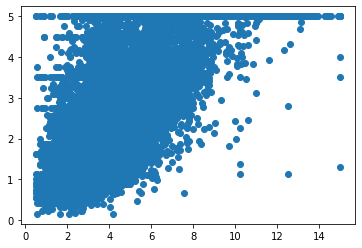

In [135]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


california = fetch_california_housing()
plt.scatter(california.data[:, 0], california.target);

Случайно сгенерируем веса:

In [136]:
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)

In [137]:
w0, w1

(tensor([-0.3137], requires_grad=True), tensor([0.1553], requires_grad=True))

Создадим тензор с признаком и тензор таргетов:

In [138]:
# Что-то типа нормализации
x = torch.tensor(california.data[:, 0] / 10, dtype=torch.float32)
y = torch.tensor(california.target, dtype=torch.float32)

Сделаем предсказания и посчитаем лосс:

In [139]:
y_pred = w1 * x + w0
loss = torch.mean((y_pred - y) ** 2) # MSE Loss

In [140]:
loss

tensor(6.6782, grad_fn=<MeanBackward0>)

Backpropagation в одну строчку:

In [143]:
loss.backward()

In [144]:
print("dL/dw0 = \n", w0.grad)
print("dL/dw1 = \n", w1.grad)

dL/dw0 = 
 tensor([-4.6444])
dL/dw1 = 
 tensor([-2.0882])


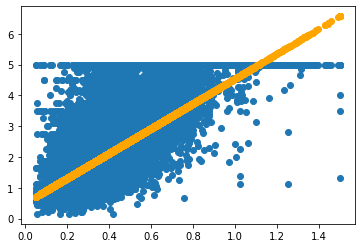

Epoch 500 / 500
loss =  0.70182776


In [145]:
from IPython.display import clear_output

n_epochs = 500
lr = 0.1
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)

for i in range(n_epochs):
    y_pred = w1 * x + w0

    # Считаем лосс
    loss = torch.mean((y_pred - y) ** 2)

    # Вычисляем градиенты
    loss.backward()

    # Делаем шаг градиентного спуска по весам
    w0.data -= lr * w0.grad.data
    w1.data -= lr * w1.grad.data

    # обнуляем градиенты, так как иначе Torch будет их суммировать!!!
    w0.grad.data.zero_()
    w1.grad.data.zero_()

    # Остальной код просто для красоты!
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange")
        plt.show()

        print(f"Epoch {i + 1} / {n_epochs}")
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

А если не обнулять градиенты:

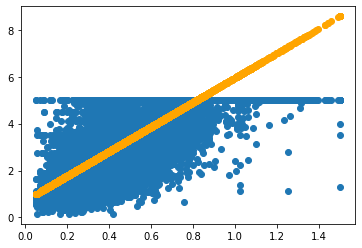

Epoch 500 / 500
loss =  1.2102808


In [146]:
from IPython.display import clear_output

n_epochs = 500
lr = 0.1
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)

for i in range(n_epochs):
    y_pred = w1 * x + w0

    # Считаем лосс
    loss = torch.mean((y_pred - y) ** 2)

    # Вычисляем градиенты
    loss.backward()

    # Делаем шаг градиентного спуска по весам
    w0.data -= lr * w0.grad.data
    w1.data -= lr * w1.grad.data

    # обнуляем градиенты, так как иначе Torch будет их суммировать!!!
    # w0.grad.data.zero_()
    # w1.grad.data.zero_()

    # Остальной код просто для красоты!
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color= "orange")
        plt.show()

        print(f"Epoch {i + 1} / {n_epochs}")
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

**Замечание:** Градиенты помещаются в поле `.grad` тензоров, на которых они вычисляются.

In [157]:
w1

tensor([5.4151], requires_grad=True)

In [148]:
w1.grad

tensor([-1.7840])

Граф вычислений динамический!

In [149]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [150]:
# Нужно использовать при тестировании или валидации моделей
with torch.no_grad():
    # Тут делаем предсказания, считаем лосс и все такое
    pass

## Пример простой сети на датасете MNIST

В PyTorch для создания нейронных сетей требуется отнаследоваться от класса nn.Module и переопределить метод forward, в который подаются входные данные, и ожидаются выходные данные.

[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)

### Загрузим датасет:

Сейчас мы будем использовать встроенные данные, но в реальности приходится писать свой класс для датасета (Dataset), у которого реализовывать несколько обязательных методов (напр, \_\_getitem__), но это обсудим уже потом.

In [158]:
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))])

trainset = MNIST(root="./MNIST", train=True, download=False, transform=transform)
testset = MNIST(root="./MNIST", train=False, download=False, transform=transform)

batch_size = 64
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Что такое Dataset и Dataloader?

In [159]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./MNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [160]:
type(trainset[0])

tuple

In [161]:
image, label = trainset[0]

In [162]:
label

5

In [163]:
image.shape

torch.Size([1, 28, 28])

5


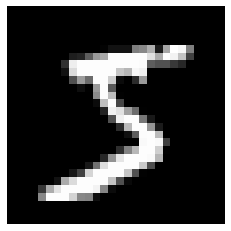

In [164]:
print(label)
plt.imshow(image.view(28, 28).numpy(), cmap="gray")
plt.axis("off");

### Построим нашу первую нейронную сеть:

В класс мы добавляем две переменные, два слоя Linear. Linear - это слой, позволяющий, умножить веса на входной вектор и добавить смещение. Первый параметр - размер входного вектора, второй - размер выходного.

В методе forward мы указываем последовательность применения операций для получения результата. Сначала изменим представление входного вектора, чтобы от изменения batch_size у нас ничего не сломалось.

Далее идёт первый слой, после него функция активации relu и второй слой, возвращающий вектор длиной 10, означающий принадлежность к одному из классов.

In [166]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [176]:
class MyAwesomeNet(nn.Module):
    def __init__(self):
        # Тут можно сделать многое: передавать число слоев, входных признаков и тд
        # но пока что ограничимся чем-то простым

        super().__init__() # Не нужно забывать про это, иначе ничего не сработает

        # Опрелелим два слоя
        # fc - fully connected (по сути значит линейные слои)

        # in_features число входов у каждого нейрона, out_features число нейронов
        self.fc1 = nn.Linear(in_features=28*28, out_features=128)
        # in_features число нейронов пред слоя, out_features число классов (10)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        #self.activation = nn.ReLU() # можно так, а можно уже в forward'е

    def forward(self, x): # вызывается в методе __call__ (когда скобочки ставим)
        x = x.view(-1, 28*28) # переведем картинку в вектор
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        # У нас пока что логиты!
        return x

Слои и активации можно объединять в блоки при помощи `nn.Sequential`

In [168]:
block = nn.Sequential(
                       nn.Flatten(),
                       nn.Linear(28*28, 128),
                       nn.ReLU(),
                       nn.Linear(128, 10)
)

In [169]:
image.shape

torch.Size([1, 28, 28])

In [170]:
block(image.view(1, 1, 28, 28)) # По сути сеть, объявленная выше
# block(image.view(-1, 28*28)) # Если без nn.Flatten()

tensor([[ 0.2094,  0.0924,  0.2425,  0.0422,  0.1280, -0.1929, -0.0908,  0.1491,
         -0.0120,  0.0664]], grad_fn=<AddmmBackward0>)

### Самое сложное и интересное. Модель у нас есть, но теперь ее надо создать и обучить:

In [177]:
neural_net = MyAwesomeNet()

In [178]:
neural_net

MyAwesomeNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [180]:
for param in neural_net.parameters():
    print(param.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


Определим нашу лосс-функцию

In [182]:
# Часто еще называют criterion
loss_function = nn.CrossEntropyLoss()

Определим оптимизатор для найшей сети. Оптимизатор, в библиотеках для нейронных сетей - это то, что осуществляет градиентный спуск. Подробнее об оптимизаторах будет рассказано в дальнейших лекциях.

In [184]:
optimizer = torch.optim.SGD(neural_net.parameters(), lr=0.001)

### Самое важное и самое сложное

Теперь нужно написать код, который обучает модель, мы уже делали что-то похожее выше для логистической регрессии, но теперь все по-взрослому. Обычно такой код выделяют в функцию `train` или в класс, но пока что напишем простой цикл:

In [185]:
%%time
n_epochs = 10
loss_history = []
for epoch in range(n_epochs):
    epoch_loss = 0
    for images, labels in trainloader: # Получаем батч тренировочных картинок
        optimizer.zero_grad() # чтобы не было как в лог регрессии, когда мы не обнуляли градиенты
        outputs = neural_net(images) # делаем предсказания
        loss = loss_function(outputs, labels) # считаем лосс
        loss.backward() # считаем градиенты
        optimizer.step() # делаем шаг градиентного спуска

        epoch_loss += loss.item()

    loss_history.append(epoch_loss/len(trainloader))

    print(f"Epoch={epoch+1} loss={loss_history[epoch]:.4f}")

Epoch=1 loss=1.8677
Epoch=2 loss=1.1630
Epoch=3 loss=0.8101
Epoch=4 loss=0.6477
Epoch=5 loss=0.5601
Epoch=6 loss=0.5060
Epoch=7 loss=0.4690
Epoch=8 loss=0.4425
Epoch=9 loss=0.4222
Epoch=10 loss=0.4059
CPU times: user 4min 39s, sys: 7.11 s, total: 4min 46s
Wall time: 53.3 s


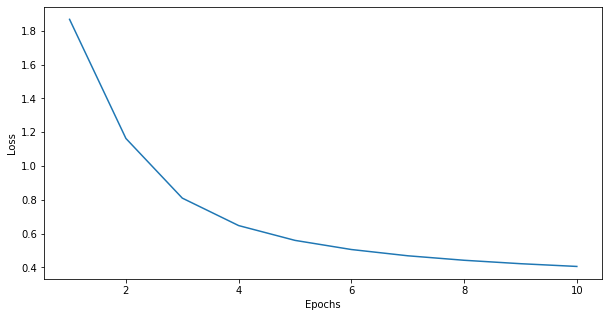

In [186]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot([i+1 for i in range(n_epochs)], loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Не зря же мы говорили про GPU, попробуем:

In [187]:
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda:0


In [188]:
neural_net = MyAwesomeNet().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
# обязательно создаем новый, модель то теперь на видеокарте
optimizer = torch.optim.SGD(neural_net.parameters(), lr=0.001)

In [189]:
!nvidia-smi

Mon Mar 25 20:04:57 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.239.06   Driver Version: 470.239.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0    27W /  N/A |   1765MiB /  7982MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [190]:
%%time
n_epochs = 10
loss_history = []
for epoch in range(n_epochs):
    epoch_loss = 0
    for images, labels in trainloader: # Получаем батч тренировочных картинок
        optimizer.zero_grad() # чтобы не было как в лог регрессии, когда мы не обнуляли градиенты
        outputs = neural_net(images) # делаем предсказания
        loss = loss_function(outputs, labels) # считаем лосс
        loss.backward() # считаем градиенты
        optimizer.step() # делаем шаг градиентного спуска

        epoch_loss += loss.item()

    loss_history.append(epoch_loss/len(trainloader))

    print(f"Epoch={epoch+1} loss={loss_history[epoch]:.4f}")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [191]:
%%time
n_epochs = 10
loss_history = []
for epoch in range(n_epochs):
    epoch_loss = 0
    for images, labels in trainloader: # Получаем батч тренировочных картинок
        # Данные тоже нужно положить на видеокарту
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad() # чтобы не было как в лог регрессии, когда мы не обнуляли градиенты
        outputs = neural_net(images) # делаем предсказания
        loss = loss_function(outputs, labels) # считаем лосс
        loss.backward() # считаем градиенты
        optimizer.step() # делаем шаг градиентного спуска

        epoch_loss += loss.item()

    loss_history.append(epoch_loss/len(trainloader))

    print(f"Epoch={epoch+1} loss={loss_history[epoch]:.4f}")

Epoch=1 loss=1.9102
Epoch=2 loss=1.2185
Epoch=3 loss=0.8428
Epoch=4 loss=0.6671
Epoch=5 loss=0.5728
Epoch=6 loss=0.5150
Epoch=7 loss=0.4760
Epoch=8 loss=0.4480
Epoch=9 loss=0.4269
Epoch=10 loss=0.4104
CPU times: user 22.9 s, sys: 5.49 s, total: 28.4 s
Wall time: 51.3 s


Получается GPU не помогает?

Давайте посчитаем `accuracy`:

In [192]:
def calculate_accuracy(model, dataloader):
    correct, total = 0, 0
    # не хотим хранить в памяти градиенты
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            outputs = model.forward(images)
            # torch.max возвращает еще и индексы максимумов, они то нам и нужны
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [193]:
acc_train = calculate_accuracy(neural_net, trainloader)
print(f"Accuracy train = {acc_train}")
acc_test = calculate_accuracy(neural_net, testloader)
print(f"Accuracy test = {acc_test}")

Accuracy train = 0.88865
Accuracy test = 0.8947


С Dalaloader можно работать так:

In [194]:
images, classes = next(iter(testloader))
images.shape

torch.Size([64, 1, 28, 28])

In [195]:
outputs = neural_net.forward(images.to(DEVICE))
outputs.shape

torch.Size([64, 10])

In [196]:
images = torch.reshape(images, (64, 28, 28))
images.shape

torch.Size([64, 28, 28])

In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
outputs = outputs[:10]
outputs.shape
# сложная строчка, но мы разберем)
digits = np.argmax(outputs.detach().cpu().numpy(), axis=1)

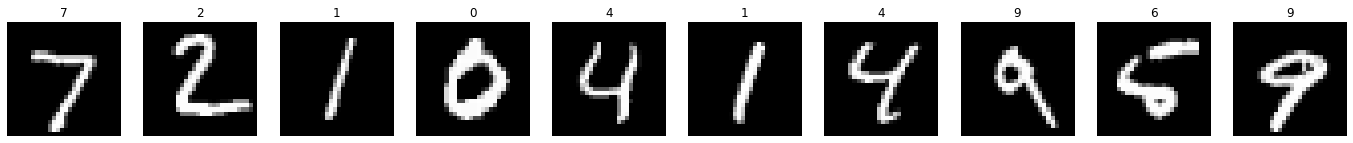

In [199]:
plt.rcParams["figure.figsize"] = 24, 13
for i, (digit, image) in enumerate(zip(digits, images)):
    plt.subplot(1, 10, i+1)
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(digit)
    plt.axis("off")

# Ссылки:

[Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

[Функции активации нейросети: сигмоида, линейная, ступенчатая, ReLu, tahn](https://neurohive.io/ru/osnovy-data-science/activation-functions/)